In [300]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler,StandardScaler
from sklearn.linear_model import LinearRegression,ElasticNet,Ridge,Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [301]:
dt = pd.read_csv('/Users/xinyuanliang/Desktop/kc_house_data.csv')
dt.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [302]:
dt.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [303]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [304]:
dt.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [305]:
# delete duplicated rows
dt = dt.drop_duplicates()

/var/folders/y3/27ykk6jn6d9973zrtpqtdvy40000gn/T/ipykernel_79558/787323678.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dt.corr(), annot=True)


<Axes: >

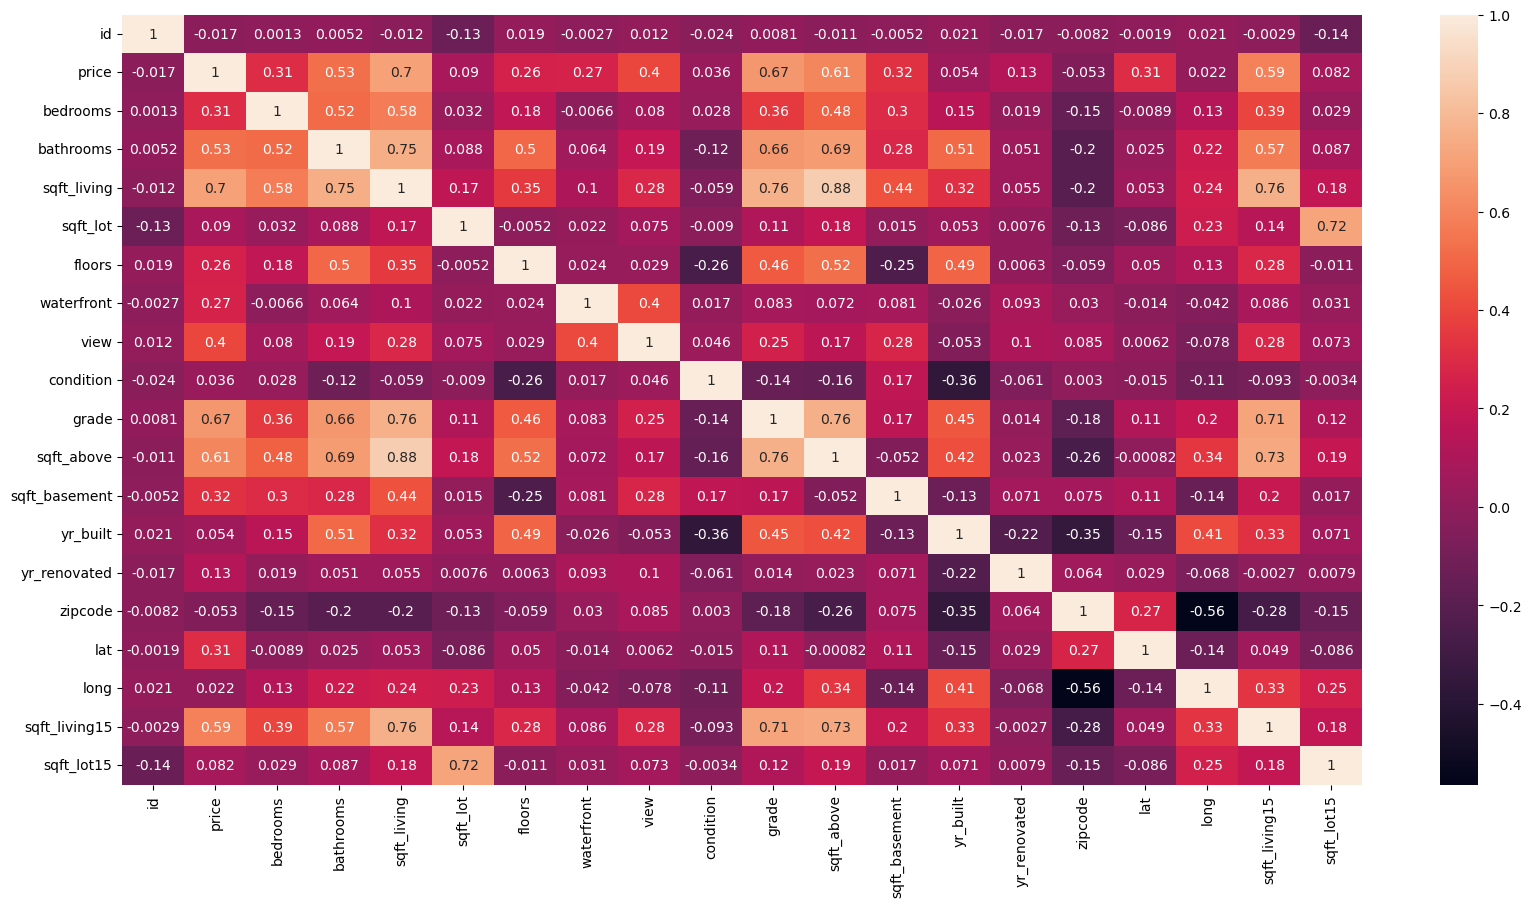

In [306]:

plt.figure(figsize=(20,10))
sns.heatmap(dt.corr(), annot=True)
# this heatmap shows that the price is highly correlated with sqft_living, grade, sqft_above, sqft_living15, bathrooms, sqft_basement, bedrooms, lat, view, floors, waterfront, sqft_lot15, sqft_lot, yr_renovated, yr_built, condition, long, zipcode

In [307]:
# convert the date to int and remove the T000000
dt['date'] = dt['date'].str.replace('T000000', '')
dt['date'] = dt['date'].astype(int)

# set the id as the index
dt.set_index('id', inplace=True)

# drop the lat and long columns because they are same thing with zipcode
dt = dt.drop(columns=['lat', 'long'])

# drop the sqft_living15 and sqft_lot15 columns because they are highly correlated with sqft_living and sqft_lot
dt = dt.drop(columns=['sqft_living15', 'sqft_lot15'])
dt.head(10)


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
id,,,,,,,,,,,,,,,,
7129300520,20141013,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178
6414100192,20141209,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125
5631500400,20150225,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028
2487200875,20141209,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136
1954400510,20150218,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074
7237550310,20140512,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053
1321400060,20140627,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003
2008000270,20150115,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198
2414600126,20150415,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146


In [308]:
# Create a function to get dummy variables for grade in to 5 categories
def grade_to_dummy(g):
    if g>= 1 and g<=3:
        return 'low quality'
    elif g>= 4 and g<=6:
        return 'lower-middle quality'
    elif g==7:
        return 'middle quality'
    elif g>= 8 and g<=10:
        return 'upper-middle quality'
    else:
        return 'high quality'
    
# Apply the function to the grade column
dt['grade'] = dt['grade'].apply(grade_to_dummy)


In [309]:
# show the dummy variables
grade_dummies = pd.get_dummies(dt['grade'])
grade_dummies.head()

,high quality,low quality,lower-middle quality,middle quality,upper-middle quality
id,,,,,
7129300520,0,0,0,1,0
6414100192,0,0,0,1,0
5631500400,0,0,1,0,0
2487200875,0,0,0,1,0
1954400510,0,0,0,0,1


In [310]:
# concat the dummy variables to the original dataset
dt = pd.concat([dt, grade_dummies], axis=1)
dt.head()


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,high quality,low quality,lower-middle quality,middle quality,upper-middle quality
id,,,,,,,,,,,,,,,,,,,,,
7129300520,20141013,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,0,0,0,1,0
6414100192,20141209,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,0,0,0,1,0
5631500400,20150225,180000.0,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,0,0,1,0,0
2487200875,20141209,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,0,0,0,1,0
1954400510,20150218,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,0,0,0,0,1


In [311]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 7129300520 to 1523300157
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date                  21613 non-null  int64  
 1   price                 21613 non-null  float64
 2   bedrooms              21613 non-null  int64  
 3   bathrooms             21613 non-null  float64
 4   sqft_living           21613 non-null  int64  
 5   sqft_lot              21613 non-null  int64  
 6   floors                21613 non-null  float64
 7   waterfront            21613 non-null  int64  
 8   view                  21613 non-null  int64  
 9   condition             21613 non-null  int64  
 10  grade                 21613 non-null  object 
 11  sqft_above            21613 non-null  int64  
 12  sqft_basement         21613 non-null  int64  
 13  yr_built              21613 non-null  int64  
 14  yr_renovated          21613 non-null  int64  
 15  zipco

In [312]:

# # convert waterfront to object
# dt['waterfront'] = dt['waterfront'].astype('object')

# # convert view to object
# dt['view'] = dt['view'].astype('object')

# # convert condition to object
# dt['condition'] = dt['condition'].astype('object')

# dt.info()


In [313]:
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler

# # Separate the numerical and categorical variables
# dt_num = dt.select_dtypes(include=['float64', 'int64','uint8'])
# dt_cat = dt.select_dtypes(include=['object'])

# # Standardize the numerical variables
# scaler = StandardScaler()
# dt_num_std = scaler.fit_transform(dt_num)

# # Perform PCA on the standardized numerical variables
# pca = PCA()
# dt_num_pca = pca.fit_transform(dt_num_std)

# # Convert the transformed numerical data into a dataframe
# dt_num_pca = pd.DataFrame(dt_num_pca, columns=[f'PC{i+1}' for i in range(len(dt_num.columns))])

# # Reset the index of both dataframes
# dt_num_pca.reset_index(drop=True, inplace=True)
# dt_cat.reset_index(drop=True, inplace=True)

# # Concatenate the transformed numerical data with the original categorical data
# dt_combined = pd.concat([dt_num_pca, dt_cat], axis=1)

# # Print the explained variance ratio
# print('Explained variance ratio:', pca.explained_variance_ratio_)

# # Print the cumulative explained variance ratio
# cumsum_variance = np.cumsum(pca.explained_variance_ratio_)
# print('Cumulative explained variance ratio:', cumsum_variance)

# # Show the first few rows of transformed dataframe
# dt_combined.head()

In [314]:
# # set the categorical features and numerical features and target
# categorical_features = ['waterfront', 'view', 'condition', 'low quality', 'lower-middle quality', 
#                         'middle quality', 'upper-middle quality', 'high quality']
# numerical_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement',
#                         'yr_built', 'yr_renovated' ]
# target = 'price'

In [315]:

# Set the categorical features and numerical features and target
categorical_features = ['waterfront', 'view', 'condition', 'low quality', 'lower-middle quality', 
                        'middle quality', 'upper-middle quality', 'high quality']
numerical_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement',
                        'yr_built', 'yr_renovated' ]
target = 'price'

# Select the numerical features and categorical features
dt_num = dt[numerical_features]
dt_cat = dt[categorical_features]

# Standardize the numerical variables
scaler = StandardScaler()
dt_num_std = scaler.fit_transform(dt_num)

# Perform PCA on the standardized numerical variables
pca = PCA()
dt_num_pca = pca.fit_transform(dt_num_std)

# Convert the transformed numerical data into a dataframe
dt_num_pca = pd.DataFrame(dt_num_pca, columns=[f'PC{i+1}' for i in range(len(dt_num.columns))])

# Reset the index of both dataframes
dt_num_pca.reset_index(drop=True, inplace=True)
dt_cat.reset_index(drop=True, inplace=True)

# Concatenate the transformed numerical data with the original categorical data
dt_combined = pd.concat([dt_num_pca, dt_cat], axis=1)

# Print the explained variance ratio
print('Explained variance ratio:', pca.explained_variance_ratio_)

# Print the cumulative explained variance ratio
cumsum_variance = np.cumsum(pca.explained_variance_ratio_)
print('Cumulative explained variance ratio:', cumsum_variance)

# Show the first few rows of transformed dataframe
dt_combined.head()

Explained variance ratio: [3.98587932e-01 1.77549287e-01 1.15485823e-01 1.12192347e-01
 7.15694370e-02 5.35920657e-02 4.59761088e-02 2.50470000e-02
 1.30176242e-30]
Cumulative explained variance ratio: [0.39858793 0.57613722 0.69162304 0.80381539 0.87538483 0.92897689
 0.974953   1.         1.        ]


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,waterfront,view,condition,low quality,lower-middle quality,middle quality,upper-middle quality,high quality
0,-2.183701,-0.202785,-0.123401,0.106168,0.594940,0.124083,-0.350393,-0.301299,-2.862401e-13,0,0,3,0,0,1,0,0
1,0.540534,1.252095,4.355221,-1.576293,-1.033454,0.034518,-0.105683,-0.511878,1.095165e-14,0,0,3,0,0,1,0,0
2,-3.213117,-0.247186,0.146264,0.250432,0.173713,-0.529222,0.064071,0.189970,4.104424e-13,0,0,3,0,1,0,0,0
3,0.075181,1.619908,-1.039045,-0.274418,-0.612879,0.651534,0.159094,0.957853,-3.411898e-15,0,0,5,0,0,1,0,0
4,-0.696423,-0.532442,-0.296152,0.132312,-0.046270,0.224403,-1.016016,0.266005,9.509622e-15,0,0,3,0,0,0,1,0


In [316]:
# Let's do the same, but now let's reduce to 2 components
# Perform PCA
pca = PCA(n_components = 4)
df_pca = pca.fit_transform(dt_num_std)

# The transformed data is an array, convert it back into a dataframe
df_pca = pd.DataFrame(df_pca)

# Print the explained variance ratio
print('Explained variance ratio:', pca.explained_variance_ratio_)

# Print the cumulative explained variance ratio
cumsum_variance = np.cumsum(pca.explained_variance_ratio_)
print('Cumulative explained variance ratio:', cumsum_variance)

# Show the first few rows of transformed dataframe
df_pca.head()

Explained variance ratio: [0.39858793 0.17754929 0.11548582 0.11219235]
Cumulative explained variance ratio: [0.39858793 0.57613722 0.69162304 0.80381539]


,0,1,2,3
0,-2.183701,-0.202785,-0.123401,0.106168
1,0.540534,1.252095,4.355221,-1.576293
2,-3.213117,-0.247186,0.146264,0.250432
3,0.075181,1.619908,-1.039045,-0.274418
4,-0.696423,-0.532442,-0.296152,0.132312


In [317]:
# Set the new numerical features; categorical features and target are the same
new_numerical_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot']

categorical_features = ['waterfront', 'view', 'condition', 'low quality', 'lower-middle quality', 
                        'middle quality', 'upper-middle quality', 'high quality']
target = 'price'

In [318]:
dt[new_numerical_features + categorical_features].head()

,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,view,condition,low quality,lower-middle quality,middle quality,upper-middle quality,high quality
id,,,,,,,,,,,,
7129300520,3,1.00,1180,5650,0,0,3,0,0,1,0,0
6414100192,3,2.25,2570,7242,0,0,3,0,0,1,0,0
5631500400,2,1.00,770,10000,0,0,3,0,1,0,0,0
2487200875,4,3.00,1960,5000,0,0,5,0,0,1,0,0
1954400510,3,2.00,1680,8080,0,0,3,0,0,0,1,0


In [319]:
# split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(dt[categorical_features + new_numerical_features]
                                                    ,dt[target],
                                                    test_size = 0.3, random_state=1234)

In [320]:
X_train

,waterfront,view,condition,low quality,lower-middle quality,middle quality,upper-middle quality,high quality,bedrooms,bathrooms,sqft_living,sqft_lot
id,,,,,,,,,,,,
1323089056,0,0,3,0,0,1,0,0,2,1.75,1620,113862
1395500020,0,0,3,0,1,0,0,0,3,1.00,1400,10800
8024200010,0,0,2,0,0,1,0,0,2,1.00,1460,6000
3821000100,0,0,3,0,0,1,0,0,4,1.75,1620,10530
1422029138,0,0,3,0,0,0,1,0,3,2.50,2030,217805
...,...,...,...,...,...,...,...,...,...,...,...,...
1954700610,0,0,3,0,0,0,1,0,3,2.25,3360,7108
3472800065,0,0,4,0,0,0,1,0,4,3.00,3600,9687
714000315,0,0,3,0,0,1,0,0,3,2.75,1710,9448


In [321]:
y_train

id
1323089056     439000.0
1395500020     279900.0
8024200010     312000.0
3821000100     249950.0
1422029138     565000.0
                ...    
1954700610    2193000.0
3472800065    1698000.0
714000315      515000.0
7889600080     208000.0
1683600240     234975.0
Name: price, Length: 15129, dtype: float64

In [322]:
X_test

,waterfront,view,condition,low quality,lower-middle quality,middle quality,upper-middle quality,high quality,bedrooms,bathrooms,sqft_living,sqft_lot
id,,,,,,,,,,,,
9414610240,0,0,4,0,0,0,1,0,3,1.75,2030,10089
251300110,0,0,3,0,0,0,1,0,3,2.25,2510,12013
7937900220,0,0,3,0,0,0,0,1,5,2.75,3630,38461
1771110640,0,0,4,0,0,1,0,0,3,1.00,1660,11783
3905100310,0,0,3,0,0,0,1,0,4,2.50,2030,3974
...,...,...,...,...,...,...,...,...,...,...,...,...
8056000075,0,0,3,0,0,0,1,0,2,1.75,1890,9466
8564860280,0,0,3,0,0,0,1,0,3,2.50,2680,5539
5137800130,0,0,3,0,0,0,1,0,4,2.50,2718,6197


### Build a regression model to predict the price of a house. Using OLS, LASSO, Ridge and Elastic Net to find the best one.

## 1. OLS regression

In [323]:
dt.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,high quality,low quality,lower-middle quality,middle quality,upper-middle quality
id,,,,,,,,,,,,,,,,,,,,,
7129300520,20141013,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,0,0,0,1,0
6414100192,20141209,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,0,0,0,1,0
5631500400,20150225,180000.0,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,0,0,1,0,0
2487200875,20141209,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,0,0,0,1,0
1954400510,20150218,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,0,0,0,0,1


In [324]:
ols_model=ols('price ~ bedrooms + bathrooms + sqft_living + sqft_lot + waterfront + view + condition + grade',data=dt).fit()
print(ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     2962.
Date:                Sun, 09 Jul 2023   Prob (F-statistic):               0.00
Time:                        07:31:52   Log-Likelihood:            -2.9767e+05
No. Observations:               21613   AIC:                         5.954e+05
Df Residuals:                   21601   BIC:                         5.955e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [325]:
# 2. define transformers
cat_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])
num_transformer = Pipeline(steps=[('scaler', MinMaxScaler())])

In [326]:
# 3. building processor
preprocessor = ColumnTransformer(transformers=[('cat', cat_transformer, categorical_features),
                                               ('num', num_transformer, new_numerical_features)])

In [327]:
# Create Lasso model
lasso_regression = Pipeline(steps= [
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=1.0))
    ])

In [328]:
# Fit the Lasso model
lasso_regression.fit(X_train, y_train)

/Users/xinyuanliang/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.218e+13, tolerance: 2.071e+11
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['waterfront', 'view',
                                                   'condition', 'low quality',
                                                   'lower-middle quality',
                                                   'middle quality',
                                                   'upper-middle quality',
                                                   'high quality']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['bedrooms', 'bathrooms',
                                                   'sqft_living',
                                                   'sqft_lot'])])),
                ('regressor', Lasso())])

In [329]:
# Get predictions
lasso_pred = lasso_regression.predict(X_test)

# Get the R-squared score
lasso_score = r2_score(y_test, lasso_pred)
print('Lasso R-squared score:', lasso_score)


Lasso R-squared score: 0.6003185559202665


In [330]:
# get the mean squared error
lasso_mse = mean_squared_error(lasso_pred, y_test)
print('Lasso MSE:', lasso_mse)

# get the root mean squared error
lasso_rmse = np.sqrt(lasso_mse)
print('Lasso RMSE:', lasso_rmse)

Lasso MSE: 51917910073.46869
Lasso RMSE: 227855.0198557598


### Ridge model

In [331]:
#  Create Ridge model
ridge_regression = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=3.0))
    ])

In [332]:
# fit the Ridge model
ridge_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['waterfront', 'view',
                                                   'condition', 'low quality',
                                                   'lower-middle quality',
                                                   'middle quality',
                                                   'upper-middle quality',
                                                   'high quality']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['bedrooms', 'bathrooms',
                                                   'sqft_living',
                                                   'sqft_lot'])])),
                ('regressor', Ridge(alpha=3.0))])

In [333]:
# get predictions
ridge_pred = ridge_regression.predict(X_test)

In [334]:
#  get the R-squared score
ridge_score = r2_score(y_test, ridge_pred)
print('Ridge R-squared score:', ridge_score)

Ridge R-squared score: 0.6004701166987779


In [335]:
#  get the mean squared error
ridge_mse = mean_squared_error(ridge_pred, y_test)
print('Ridge MSE:', ridge_mse)

#  get the root mean squared error
ridge_rmse = np.sqrt(ridge_mse)
print('Ridge RMSE:', ridge_rmse)

Ridge MSE: 51898222597.38999
Ridge RMSE: 227811.8139987257


### ElasticNet model

In [336]:
# Create ElasticNet model
elasticnet_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet(alpha=1.0, l1_ratio=0.2))
])

In [337]:
# fit the ElasticNet model
elasticnet_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['waterfront', 'view',
                                                   'condition', 'low quality',
                                                   'lower-middle quality',
                                                   'middle quality',
                                                   'upper-middle quality',
                                                   'high quality']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['bedrooms', 'bathrooms',
                                                   'sqft_living',
                                                   'sqft_lot'])])),
                ('regressor', ElasticNet(l1_ratio=0.2))])

In [338]:
#  get predictions
elasticnet_pred = elasticnet_regression.predict(X_test)

In [339]:
#  get the R-squared score
elasticnet_score = r2_score(y_test, elasticnet_pred)
print('ElasticNet R-squared score:', elasticnet_score)

ElasticNet R-squared score: 0.166417966428544


In [340]:
#  get the mean squared error
elasticnet_mse = mean_squared_error(elasticnet_pred, y_test)
print('ElasticNet MSE:', elasticnet_mse)

#  get the root mean squared error
elasticnet_rmse = np.sqrt(elasticnet_mse)
print('ElasticNet RMSE:', elasticnet_rmse)

ElasticNet MSE: 108280826390.29999
ElasticNet RMSE: 329060.5208625003


In [348]:
# main driver of house price in King City using Ridge Regression
ridge_regression = Ridge(alpha=3.0)
ridge_regression.fit(X_train, y_train)
coefficients = ridge_regression.coef_

feature_names = X_train.columns


dt_ridge_coef = pd.DataFrame({'Features': feature_names, 'Coefficients': coefficients}).sort_values('Coefficients', ascending=False)
dt_ridge_coef



,Features,Coefficients
0,waterfront,552416.960844
7,high quality,425173.236666
1,view,64215.895123
2,condition,49862.211885
10,sqft_living,228.355602
11,sqft_lot,-0.463157
9,bathrooms,-915.951197
8,bedrooms,-34174.586507
3,low quality,-37418.160294
6,upper-middle quality,-73594.977154


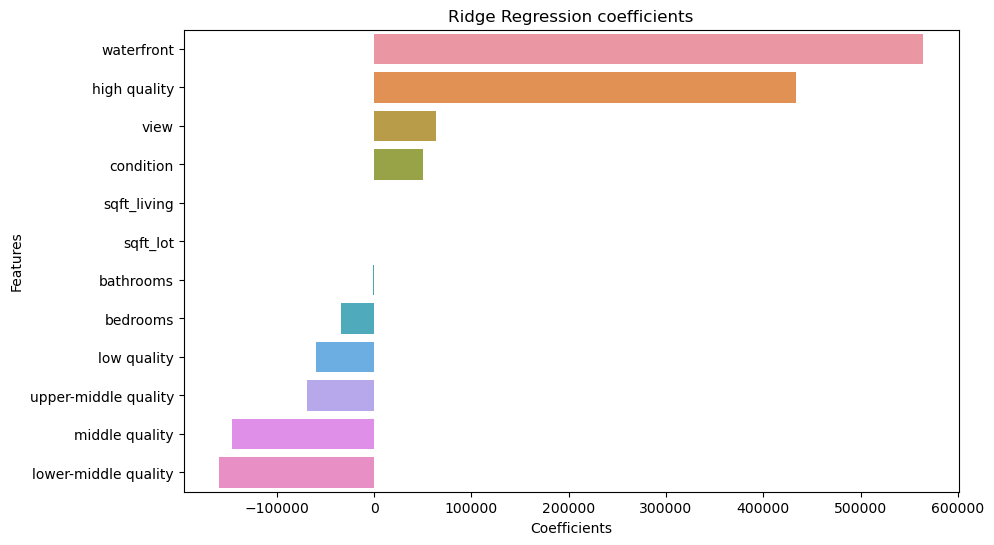

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficients', y='Features', data=dt_ridge_coef.sort_values(by='Coefficients', ascending=False))
plt.title('Ridge Regression coefficients')
plt.show()

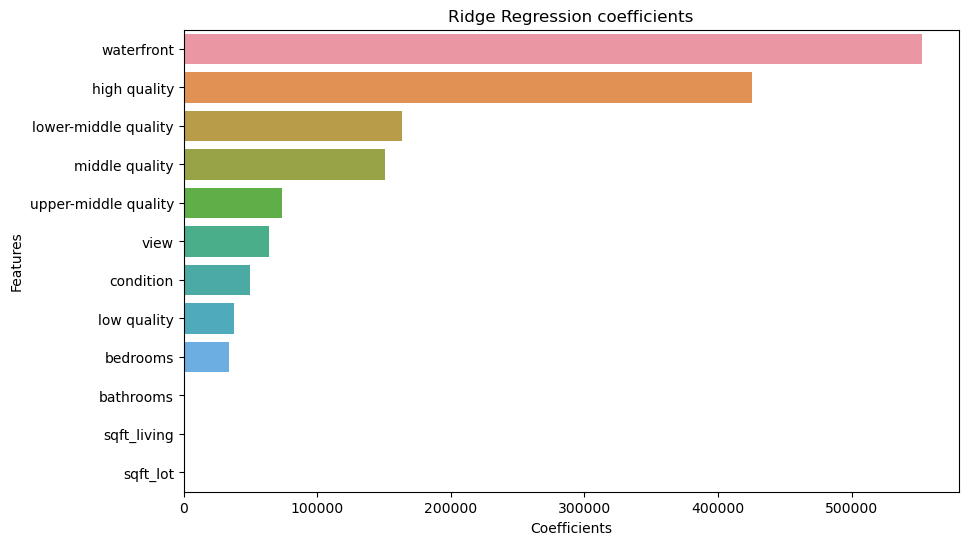

,Features,Coefficients
0,waterfront,552416.960844
7,high quality,425173.236666
1,view,64215.895123
2,condition,49862.211885
10,sqft_living,228.355602
11,sqft_lot,-0.463157
9,bathrooms,-915.951197
8,bedrooms,-34174.586507
3,low quality,-37418.160294
6,upper-middle quality,-73594.977154


In [349]:
# which features have the most impact on the house price
# 1. get the absolute value of the coefficients
dt_ridge_coef['Coefficients'] = dt_ridge_coef['Coefficients'].abs()

# 2. sort the dataframe based on the absolute value of the coefficients
dt_ridge_coef = dt_ridge_coef.sort_values(by='Coefficients', ascending=False)

# 3. plot the dataframe
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficients', y='Features', data=dt_ridge_coef)
plt.title('Ridge Regression coefficients')
plt.show()

# main driver of house price in King City using Ridge
ridge_regression = Ridge(alpha=3.0)
ridge_regression.fit(X_train, y_train)
coefficients = ridge_regression.coef_

feature_names = X_train.columns

dt_ridge_coef = pd.DataFrame({'Features': feature_names, 'Coefficients': coefficients}).sort_values('Coefficients', ascending=False)
dt_ridge_coef






In [ ]:
# so we c

In [ ]:
# 9. get the coefficients

ridge_coef = ridge_regression.named_steps['regressor'].coef_

print('Ridge coefficients:', ridge_coef)
# 10. get the feature names

cat_features = ridge_regression.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features)

feature_names = np.concatenate([cat_features, new_numerical_features])

print('Features:', feature_names)


Ridge coefficients: [-232407.61662505  232407.61662509 -161751.22226993  -14186.8739571
  -53622.54636239  -11763.31992966  241323.9625192   -24419.65145252
  -32184.52363308  -34475.57194407    6097.87912691   84981.86790273
   36464.35673786  -36464.35673786   88778.19514967  -88778.19514965
   79600.09718066  -79600.09718084   34114.0790576   -34114.07905764
 -238956.72812631  238956.72812632 -623503.5599602    84408.08422302
 2548416.33368172 -469956.83747853]
Features: ['waterfront_0' 'waterfront_1' 'view_0' 'view_1' 'view_2' 'view_3'
 'view_4' 'condition_1' 'condition_2' 'condition_3' 'condition_4'
 'condition_5' 'low quality_0' 'low quality_1' 'lower-middle quality_0'
 'lower-middle quality_1' 'middle quality_0' 'middle quality_1'
 'upper-middle quality_0' 'upper-middle quality_1' 'high quality_0'
 'high quality_1' 'bedrooms' 'bathrooms' 'sqft_living' 'sqft_lot']


In [ ]:


# 14. get the intercept

ridge_intercept = ridge_regression.named_steps['regressor'].intercept_

print('Ridge intercept:', ridge_intercept)

# 15. get the intercept and coefficients

print('Ridge intercept:', ridge_intercept)

print('Ridge coefficients:', ridge_coef)

# 16. get the equation


print('Ridge equation:')
print('y = {:.2f} '.format(ridge_intercept), end='')
for i, col in enumerate(feature_names):
    print('{:.2f} * {} + '.format(ridge_coef[i], col), end='')
print('\n')


Ridge intercept: 751653.1853338411
Ridge intercept: 751653.1853338411
Ridge coefficients: [-232407.61662505  232407.61662509 -161751.22226993  -14186.8739571
  -53622.54636239  -11763.31992966  241323.9625192   -24419.65145252
  -32184.52363308  -34475.57194407    6097.87912691   84981.86790273
   36464.35673786  -36464.35673786   88778.19514967  -88778.19514965
   79600.09718066  -79600.09718084   34114.0790576   -34114.07905764
 -238956.72812631  238956.72812632 -623503.5599602    84408.08422302
 2548416.33368172 -469956.83747853]
Ridge equation:
y = 751653.19 -232407.62 * waterfront_0 + 232407.62 * waterfront_1 + -161751.22 * view_0 + -14186.87 * view_1 + -53622.55 * view_2 + -11763.32 * view_3 + 241323.96 * view_4 + -24419.65 * condition_1 + -32184.52 * condition_2 + -34475.57 * condition_3 + 6097.88 * condition_4 + 84981.87 * condition_5 + 36464.36 * low quality_0 + -36464.36 * low quality_1 + 88778.20 * lower-middle quality_0 + -88778.20 * lower-middle quality_1 + 79600.10 * midd